In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv("pd_speech_features.csv") # import dataset 

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df.info

In [ ]:
column_name = "tqwt_entropy_log_dec_1"
column_index = df.columns.get_loc(column_name)

print(column_index)

394


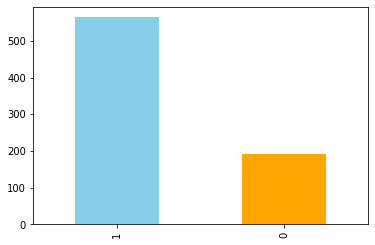

In [ ]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "orange"]);

In [ ]:
for col in df.columns:
    print(col)

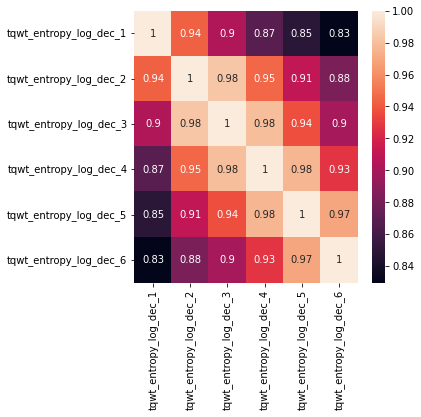

In [ ]:
import seaborn as sb
plt.figure(figsize=(5,5))
sb.heatmap(df[df.columns[394:400]].corr(),annot=True)

In [ ]:
X = df.iloc[:, 0:754].values  # select the independent variables
y = df.iloc[:, 754].values    # select the dependent variable and target column

In [ ]:
## PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(x_pca.shape)

principalDf = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
print(finalDf)


(756, 2)
     principal component 1  principal component 2  class
0               -10.065554               1.474702      1
1               -10.654185               1.588302      1
2               -13.533170              -1.245931      1
3                -9.154170               8.847802      1
4                -6.769873               4.623100      1
..                     ...                    ...    ...
751              22.389377               6.471470      0
752              13.515579               1.452390      0
753               8.341586               2.394364      0
754               4.087818               5.419607      0
755               4.065895               6.078364      0

[756 rows x 3 columns]


Text(0, 0.5, 'Second Principal Component')

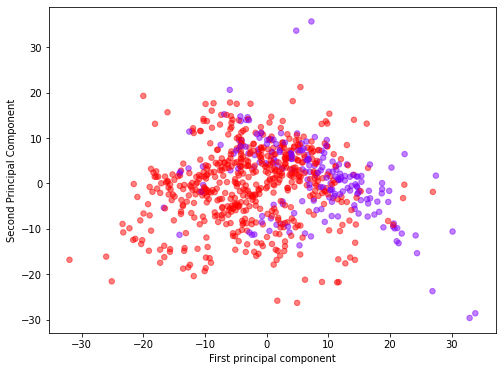

In [ ]:
import matplotlib.pyplot as plt


colors = (0,0,0)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], s=30, c=finalDf['class'], cmap='rainbow', alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

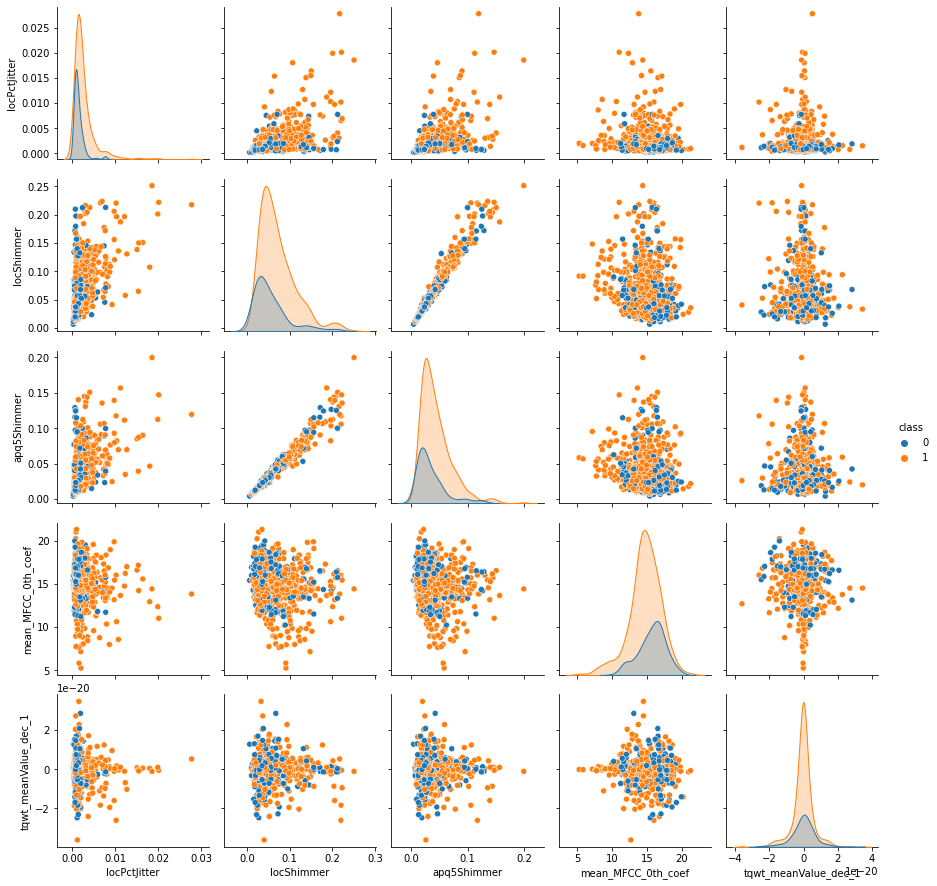

In [ ]:
#pairplot
import seaborn as sb
plt.rcParams['figure.figsize'] = (15, 4)
sb.pairplot(df,hue = 'class', vars = ['locPctJitter','locShimmer','apq5Shimmer','mean_MFCC_0th_coef', 'tqwt_meanValue_dec_1'] )
plt.show()

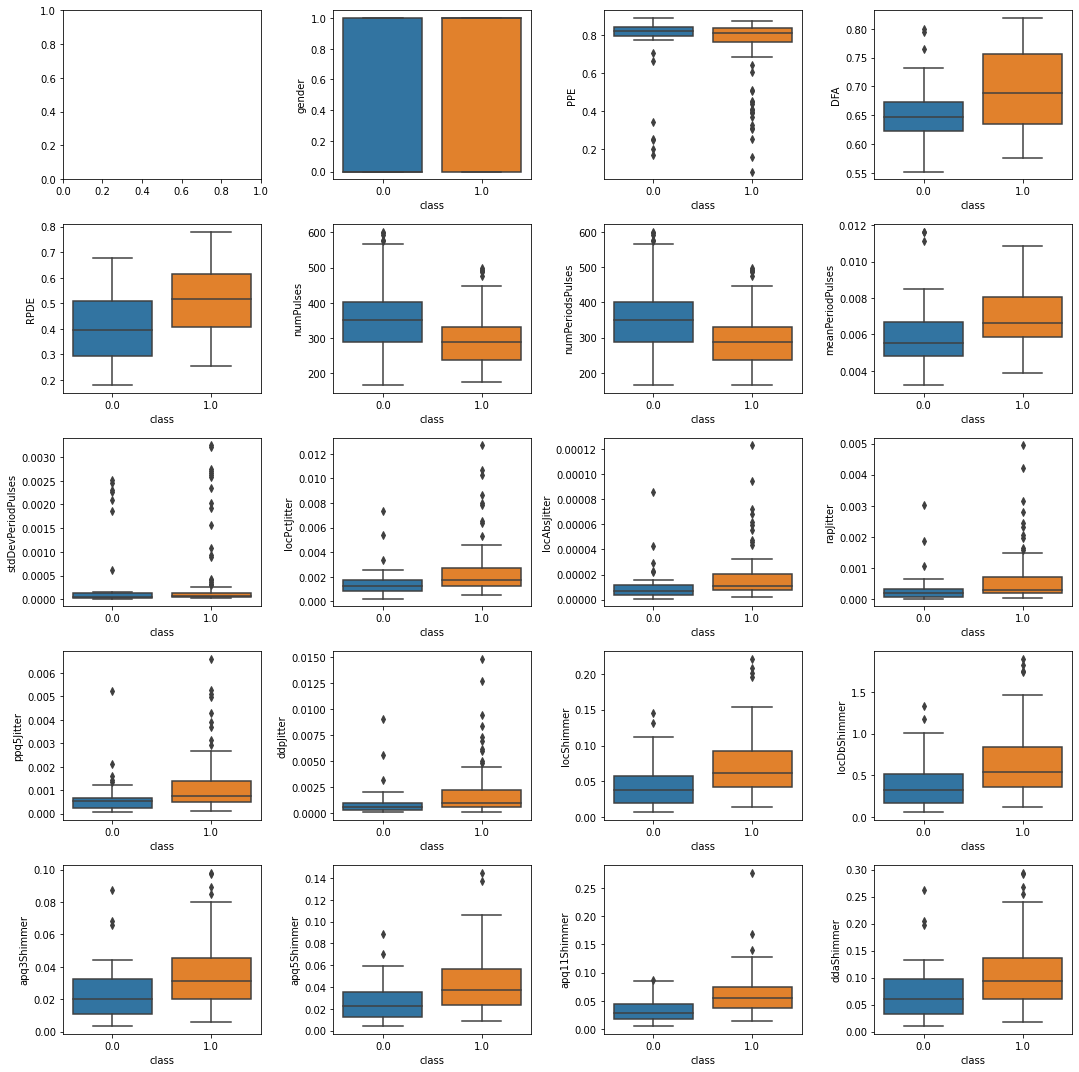

In [ ]:
fig,axes=plt.subplots(5,4,figsize=(15,15))
axes=axes.flatten()

# for i in range(1,len(df.columns)-1):
for i in range(1,20):
    sb.boxplot(x='class',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()
     

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import numpy as np

y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

oversampled = np.column_stack((X, y))
num_ones = np.count_nonzero(oversampled[:, -1] == 1)
print("number of PD:", num_ones)
print("number of non-PD:", oversampled.shape[0]-num_ones)

number of PD: 564
number of non-PD: 564


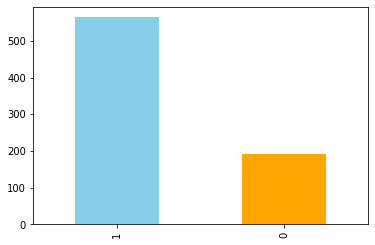

In [ ]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "orange"]);

In [ ]:
df["class"].value_counts().plot(kind = "bar", color = ["skyblue", "orange"]);